# E-COMMERCE ICE: EL JUEGO, ¿ES EXITOSO?

Te encuentras en **diciembre** de **2016**, trabajando para **ICE**, una tienda online dedicada a la venta de videojuegos a nivel mundial. Contamos con un conjunto de datos que abarca reseñas (de usuarios y expertos), géneros, plataformas, datos históricos de ventas y una columna clave: el **rating** de ESRB, que clasifica el contenido de cada videojuego según la edad.

Nuestro objetivo principal es identificar patrones que determinen el éxito de un juego, lo que nos permitirá detectar proyectos prometedores y planificar campañas publicitarias efectivas para **2017**.

**Metodología de Trabajo**

Para este proyecto, emplearemos **Python** junto con librerías esenciales como **NumPy** para operaciones numéricas, **Pandas** para la manipulación y análisis de datos, **Matplotlib** y **Seaborn** para la visualización y **Scipy** y **Math** para operaciones matematicas más complejas y estadísticas. Nuestro objetivo es comprender, manejar y analizar los datos para identificar patrones y realizar pruebas de hipótesis. Finalmente, buscaremos generar conclusiones útiles que permitan detectar *insights* valiosos y desarrollar estrategias fundamentadas.

## 1. Inicialización
A continuación, comenzaremos cargando, tanto las librerías necesarias de Python como los datos. Verificaremos también la información general de nuestro dataframe.

In [ ]:
# Cargamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import math
import scipy.stats as st

In [2]:
# Cargamos el conjunto de datos
games_df = pd.read_csv("games.csv")

In [3]:
# Mostramos la información general resumida sobre el dataframe games
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Presentamos un fragmento de los datos (games). Usamos .sample() para tener una muestra más dispersa de los datos y para comprobar que la carga fue exitosa
games_df.sample(10)

Name Platform  Year_of_Release         Genre  \
8493                     Stronghold 3       PC           2011.0      Strategy   
3667                 Turok: Evolution       XB           2002.0       Shooter   
5236                 South Park Rally       PS           1998.0        Racing   
13929                 Sega Rally 2006      PS2              NaN        Racing   
3524      FIFA World Cup Germany 2006      PS2           2006.0        Sports   
674           Dragon Warrior Monsters       GB           1998.0  Role-Playing   
16673  Mortal Kombat: Deadly Alliance      GBA           2002.0      Fighting   
12184                   RedCard 20-03      PS2           2002.0        Sports   
12747      Bleach: Blade Battlers 2nd      PS2           2007.0      Fighting   
6309                       Wave Rally      PS2           2001.0        Racing   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
8493       0.06      0.10      0.00         0.00          47.0          3   
3667       0.39      0.14      0.00         0.02          68.0        6.7   
5236       0.20      0.13      0.00         0.02           NaN        NaN   
13929      0.00      0.00      0.04         0.00           NaN        NaN   
3524       0.47      0.02      0.00         0.08          77.0        8.1   
674        0.00      0.00      2.34         0.01           NaN        NaN   
16673      0.01      0.00      0.00         0.00          81.0        8.8   
12184      0.03      0.03      0.00         0.01          73.0          9   
12747      0.00      0.00      0.06         0.00           NaN        NaN   
6309       0.13      0.10      0.00         0.03          62.0        tbd   

      Rating  
8493       T  
3667       M  
5236     NaN  
13929    NaN  
3524       E  
674      NaN  
16673      M  
12184      E  
12747    NaN  
6309       E

**Conclusión:** En este primer vistazo de los datos detectamos lo siguiente:
* Tenemos 16,715 entradas, que representan los videojuegos de los cuales disponemos datos.
* Tenemos 11 columnas.
    * Los nombres de las columnas comienzan con mayúsculas, por lo que es buena práctica estandarizarlas en minúsculas.
    * El tipo de dato de la columna **Year_of_release** es **float**, por lo que será necesario pasarlo a **datetime**.
    * El tipo de dato de la columna **User_score** es **object**, por lo que será necesario pasarlo a tipo **float**. Además, notamos que esta columna contine valores como **tbd** que no representan puntuaciones numéricas, por lo que deberán ser tratados antes de realizar.
    * Los demás tipos de datos son correctos.
* Valores nulos:
    * Las columnas **Name**, **Year_of_release**, **Genre**, **Critic_Score**, **User_Score** y **Rating** tienen valores ausentes.

Estas observaciones iniciales indican la necesidad de una fase de preprocesamiento de datos para asegurar su calidad y consistencia antes de proceder con el análisis.

## 2. Preparación de los datos
En este apartado procederemos a preprocesar los datos para garantizar su calidad. Esto es crucial para que nuestro análisis se desarrolle correctamente. Entre los cambios que encontramos necesarios están el manejo de los nombres de columnas, la transformación de los tipos de datos y el tratamiento de datos ausentes. Además, se enriquecerán los datos con una columna que represente las ventas totales de todas las regiones.

### 2.1 Manejo de nombres de las columnas
Se realiza el cambio de los nombres de las columnas para que estén en minúsculas, lo que facilita su manipulación.

In [5]:
# Convertimos todos los nombres de columnas a minúsculas
games_df.columns = games_df.columns.str.lower()
# Comprobación
games_df.head(1)

name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii           2006.0  Sports     41.36     28.96      3.77   

   other_sales  critic_score user_score rating  
0         8.45          76.0          8      E

### 2.2 Tratamiento de valores ausentes
Las columnas con valores ausentes son: **name**, **year_of_release**, **genre**, **critic_score**, **user_score** y **rating**. En este análisis:
* **name** y **genre**: Observaciones sin nombre o sin género carecen de sentido para el análisis, por lo que se eliminarán.
* **year_of_release**: Si falta el año de lanzamiento, también eliminaremos esas filas, ya que es una variable temporal clave.
* **critic_score** y **user_score**: No rellenaremos los valores faltantes, ya que una imputación artificial puede sesgar el análisis.
* **rating**: Se dejará como está. En análisis posteriores por región, podemos comparar los datos disponibles sin alterar su distribución.
* **user_score**: tiene valores **tbd** (to be determined), que deben tratarse como ausencias reales, ya que representan puntuaciones pendientes.

Convertiremos los **tbd** a **NaN** para poder tratar esos valores de forma coherente.

In [6]:
# Reemplazamos tbd por NaN en user_score
games_df["user_score"] = games_df["user_score"].replace("tbd", np.nan)
# Convertimos la columna a tipo float
games_df["user_score"] = games_df["user_score"].astype(float)

In [7]:
# Eliminamos registros sin nombre, género o año de lanzamiento
games_df.dropna(subset = ["name", "genre", "year_of_release"], inplace = True)

In [8]:
# Comprobación
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### 2.3 Transformación de tipos de datos
* **year_of_release**: Aunque es numérica, representa una fecha. La pasamos a tipo **int** para facilitar su interpretación como año (el tipo datetime no es necesario al no tratarse de una fecha completa).
* **user_score**: Ya fue transformada a float en el punto anterior.

In [9]:
# Transformamos el año de lanzamiento a int
games_df["year_of_release"] = games_df["year_of_release"].astype(int)

### 2.4 Enriquecimiento de los datos
Añadiremos una nueva columna llamada **total_sales**, que representa la suma de las ventas en todas las regiones. Esto nos permitirá realizar análisis globales con facilidad.

In [10]:
# Creamos la columna de ventas totales
games_df["total_sales"] = games_df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis = 1)
# Comprobación
games_df.sample()

name platform  year_of_release   genre  na_sales  eu_sales  \
6911  NBA Live 14      PS4             2013  Sports      0.15      0.05   

      jp_sales  other_sales  critic_score  user_score rating  total_sales  
6911       0.0         0.04          43.0         2.7      E         0.24

In [11]:
# Comprobación final sobre tipos de datos, valores ausentes y nueva columna
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Conclusión:**
Hemos estandarizado los nombres de las columnas, transformado los tipos de datos clave y tratado los valores ausentes de manera coherente. También enriquecimos el dataset con una nueva columna que representa las ventas globales por juego. Con estos pasos, los datos están listos para ser analizados de forma precisa y fiable.

**Nota** Los valores ausentes en las columnas **name**, **year_of_release** y **genre**, pueden deberse a diversos motivos. Lo más probable es que se trate de errores en la captura de los datos. Para las columnas **critic_score**, **user_score** y **rating**, es probable que se trata de un desfase entre la fecha en que se recogieron los datos y la fecha en que se presentaron públicamente esos datos.

## 3. Análisis de datos
Con nuestros datos ya preparados y en óptimas condiciones, el siguiente paso es sumergirnos en su exploración para **desvelar patrones y tendencias que guiarán nuestra estrategia para 2017**. El objetivo central de este análisis es identificar qué factores determinan el éxito de un videojuego en el mercado actual y cómo las plataformas, los géneros y las reseñas influyen en ello.

Para lograr este entendimiento y generar conclusiones accionables, nos centraremos en los siguientes aspectos clave:

* **Comprender la dinámica temporal del mercado:** Analizaremos la evolución del sector a lo largo de los años, prestando especial atención a los lanzamientos de juegos por año y la vida útil de las plataformas. Esto nos permitirá identificar el período de datos más relevante y representativo para nuestras predicciones de 2017.
* **Evaluar el rendimiento y ciclo de vida de las plataformas:** Investigaremos las ventas totales por plataforma, identificando cuáles son las líderes, cuáles muestran un crecimiento sostenido y cuáles están en declive. Es esencial entender cuánto tiempo una plataforma se mantiene relevante y cuáles tienen el potencial de ser rentables en el futuro cercano.
* **Analizar el impacto de las reseñas:** Examinaremos cómo las calificaciones de críticos y usuarios influyen en las ventas de los juegos, centrándonos en las plataformas más populares. Esto nos ayudará a comprender la importancia de la percepción pública en el éxito comercial.
* **Explorar la rentabilidad por género:** Desglosaremos las ventas por género para identificar cuáles son los más lucrativos y si existen patrones generales que se puedan aplicar para detectar géneros con alto o bajo potencial de ventas.

Al finalizar este análisis, estaremos en posición de detectar proyectos prometedores y sentar las bases para una campaña publicitaria estratégica y efectiva para el próximo año. 

### 3.1 Lanzamiento de juegos por año
Comenzamos analizando la cantidad de juegos lanzados por año. Esto nos permitirá detectar tendencias en el sector de videojuegos e identificar qué años tienen datos completos y confiables. Dado que los datos de 2016 pueden estar incompletos, esta visualización nos servirá para decidir el período más apropiado a considerar en el análisis posterior.

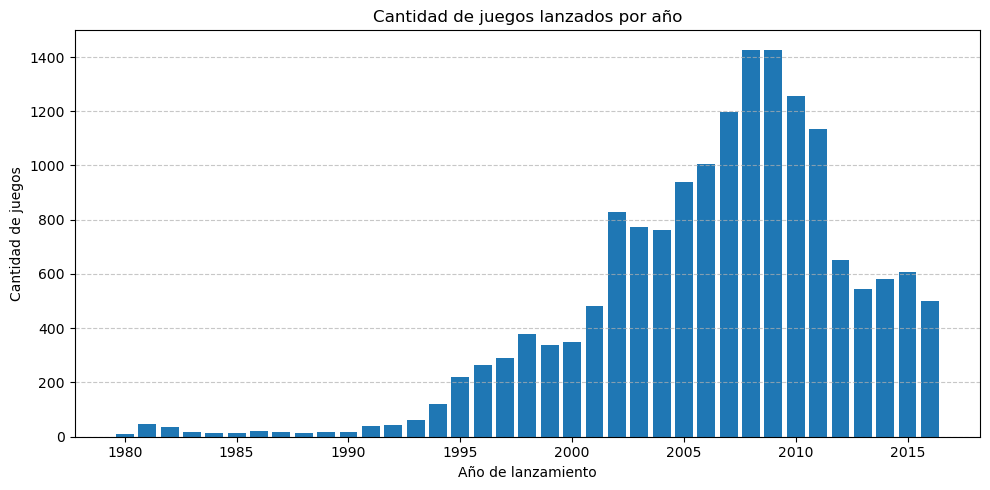

In [12]:
# Conteo del juegos por año
games_by_year = games_df["year_of_release"].value_counts().sort_index()
# Gráfico que muestra la tendencia de juegos por año
plt.figure(figsize=(10, 5))
plt.bar(games_by_year.index, games_by_year.values)
plt.title("Cantidad de juegos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos observar que la cantidad de juegos lanzados comienza a aumentar significativamente a partir del año 2002. Entre 2002 y 2011 se observa una etapa de auge, con un pico alrededor de 2008–2009. De 2012 en delante la cantidad disminuye de forma importante. Lo ideal será tomar como referencia para análisis futuros los datos desde **2005 hasta 2015**, evitando tanto años antiguos y el 2016 (dado que puede estar incompleto).

### 3.2 Ventas por plataforma a lo largo del tiempo
Ahora analizaremos la evolución de las ventas por plataforma. Esto nos permitirá identificar:

* Cuáles han sido las plataformas más exitosas históricamente.
* Cuáles siguen activas en los últimos años.
* Qué tan larga es la vida útil de una plataforma.

Este análisis nos ayudará a decidir cuáles plataformas son relevantes para enfocar nuestras predicciones y estrategias de 2017.

In [13]:
# Agrupación de ventas por año y platafomra
platform_sales_by_year = games_df.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack().fillna(0)

# Identificar las plataformas con las mayores ventas totales históricas (crucial para filtrar el gráfico)
top_platforms = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms.head(13) # No lo hice por el index para poder contemplar la magnitud de las ventas

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
Name: total_sales, dtype: float64

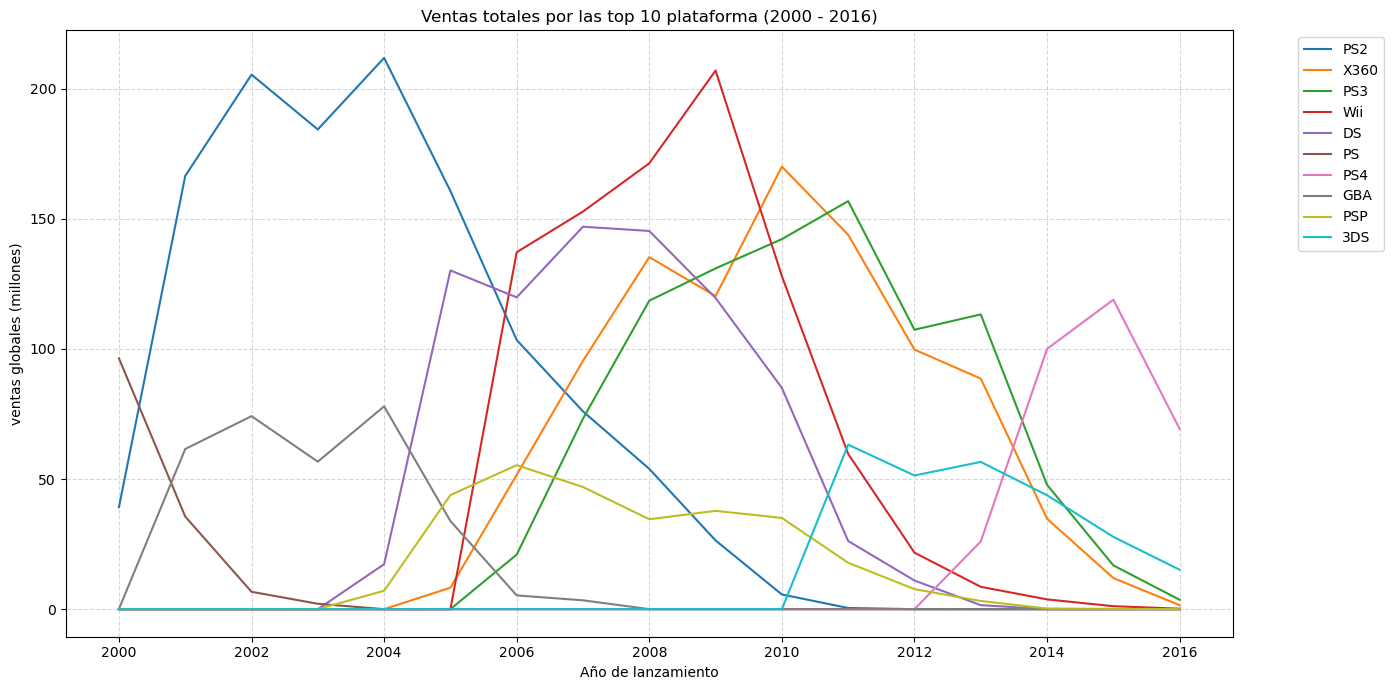

In [14]:
# Filtro por años recientes (desde 2000 para mantener la legibilidad. Por practicidad)
recent_sales = platform_sales_by_year[platform_sales_by_year.index >= 2000]
# Filtro por el top 10 (donde se empiezan a homogenizar las ventas)
top_platforms_names = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index
filtered_recent_sales = recent_sales[top_platforms_names]

# Gráfica con líneas por plataforma
plt.figure(figsize = (14, 7))
for platform in filtered_recent_sales.columns:
    plt.plot(filtered_recent_sales.index, filtered_recent_sales[platform], label=platform)
plt.title("Ventas totales por las top 10 plataforma (2000 - 2016)")
plt.xlabel("Año de lanzamiento")
plt.ylabel("ventas globales (millones)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle = "--", alpha = 0.5)
plt.tight_layout()
plt.show()

**Conclusiones**
* Durante el periodo 2000-2016, el análisis de las top 10 plataformas con mayores ventas revela una clara dinámica de surgimiento, auge y declive. Plataformas como **PS2**, **Wii**, **X360**, **PS3** y **DS** dominaron el mercado en distintos momentos, especialmente entre 2000 y 2014, con PS2 liderando fuertemente hasta 2005.
* Observamos que la vida útil de una plataforma principal con ventas significativas suele oscilar entre 7 y 10 años, con algunas desapareciendo gradualmente a medida que emergen nuevas generaciones. En este contexto, PS4 destaca como la única plataforma de este top 10 que mantiene una clara tendencia ascendente en los años más recientes, indicando su relevancia futura.

## 3.3 Selección del período relevante

Con base en los análisis anteriores, seleccionaremos un subconjunto de datos que sea representativo y actual para generar conclusiones válidas y útiles.
* Evitaremos años muy antiguos, pues las plataformas y patrones del mercado han cambiado.
* Excluiremos 2016 por la alta probabilidad de datos incompletos.
* Tomaremos como ventana los años **2010** a **2015**.

In [15]:
# Creamos subconjunto para el análisis relevante
games_recent_df = games_df[(games_df['year_of_release'] > 2009) & (games_df['year_of_release'] < 2016)]

# Comprobamos las plataformas más populares en este subconjunto
platform_sales_recent = games_recent_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales_recent

platform
PS3     584.14
X360    548.89
PS4     244.89
3DS     242.67
Wii     222.79
XOne    133.17
DS      123.75
PC      116.71
WiiU     77.59
PSP      64.05
PSV      49.56
PS2       6.09
Name: total_sales, dtype: float64

**Conclusión:**
Trabajaremos de aquí en adelante con el subconjunto de datos de los años **2010 a 2015**, ya que este período abarca tanto el final de la generación de consolas anterior con sus patrones de ventas robustos, como el inicio y crecimiento de las plataformas más recientes, proporcionando una base de datos amplia y actual para nuestras predicciones de 2017.

## 3.4 Plataforemas lideres (crecimiento o declive)
Con los datos filtrados (2010–2015), vamos a identificar:
* Cuáles son las plataformas con mayores ventas en este periodo.
* Cuáles muestran signos de crecimiento, estabilidad o declive.
* Cuáles podrían ser rentables para campañas futuras.

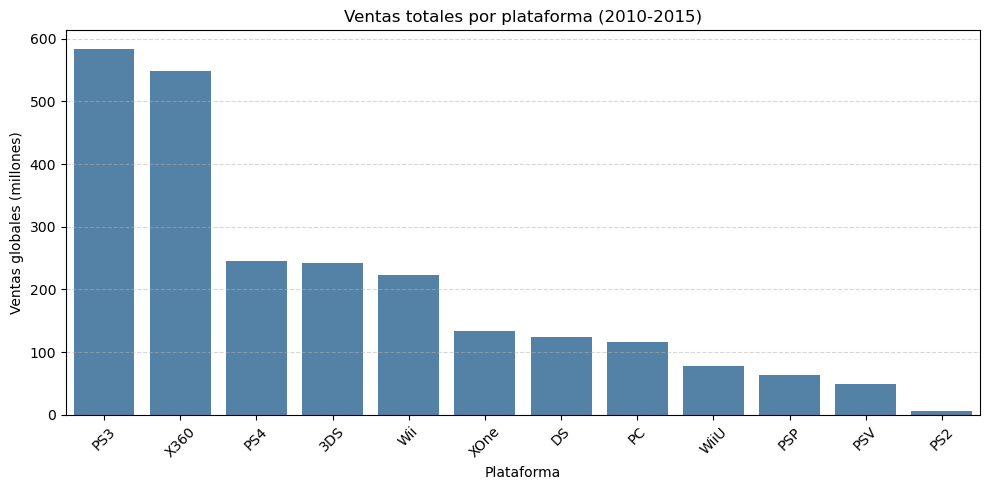

In [16]:
# Gráfico de barras: ventas totales de las plataformas 2010–2015
plt.figure(figsize=(10, 5))
sns.barplot(x=platform_sales_recent.index, y=platform_sales_recent.values, color="steelblue")
plt.title("Ventas totales por plataforma (2010-2015)")
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales (millones)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusión:**

* Durante 2010–2015, las plataformas con mayores ventas globales fueron **PS3, X360, PS4, 3DS y Wii**.
* **PS3** y **X360** lideran en volumen total de ventas en este periodo, reflejando su madurez y gran base instalada, aunque el análisis de sus tendencias anuales (visto en la sección 3.2) muestra que se encuentran en una fase de declive hacia el final del período.
* **PS4** destaca por su significativo volumen de ventas y, como se observó en la sección 3.2, **muestra una fase de crecimiento en los últimos años del periodo**, lo que la convierte en fuerte candidata para inversión y planificación en 2017.
* La aparición de **PC y XOne** también es relevante, mostrando una tendencia de crecimiento hacia los años recientes. También candidatos para nuestros planes de 2017.
* Plataformas como **Wii, DS, PSP y PSV** muestran ventas decrecientes o marginales en este período, así como un declive en el mercado, lo que indica un nulo potencial para futuras campañas.

**Nota:** PC no es una plataforma nueva, pero su comportamiento reciente justifica incluirla entre las relevantes (cambios de hardware y compatibilidad).

## 3.5 Distribución de ventas por plataforma

Analizaremos la **distribución de ventas** de los juegos por plataforma mediante un diagrama de caja (boxplot). Esto nos permitirá observar:

* La dispersión de las ventas.
* La presencia de outliers.
* Qué plataformas tienen ventas más consistentes o más variables.

C:\Users\chakm\AppData\Local\Temp\ipykernel_23668\1311601326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=games_recent_df, x='platform', y='total_sales', palette="pastel")


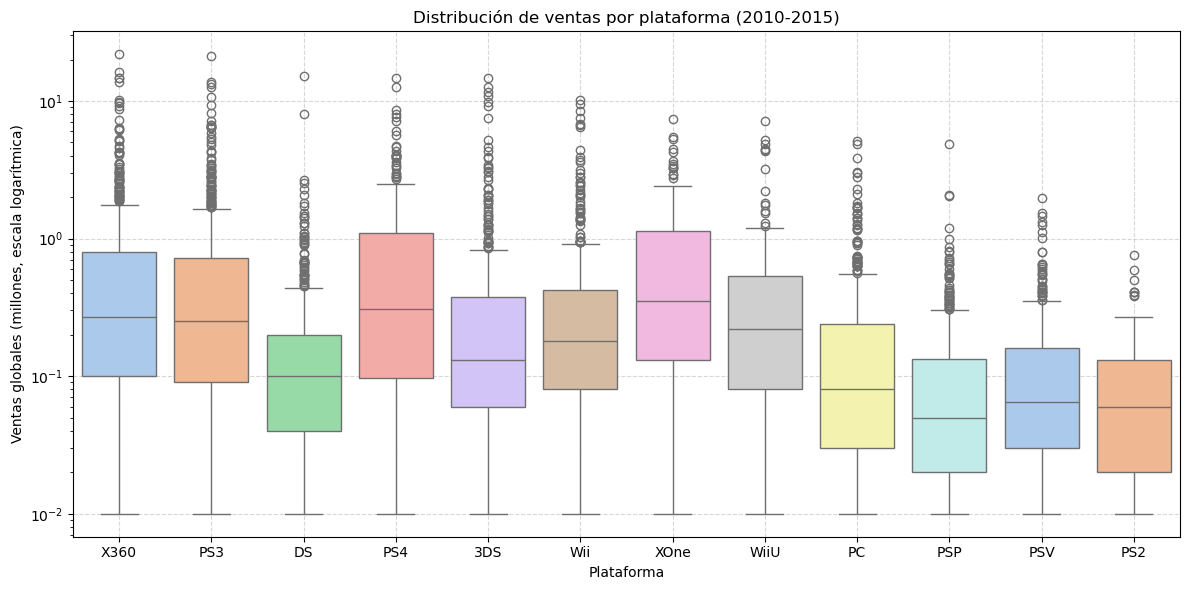

In [17]:
# Boxplot de ventas por plataforma
plt.figure(figsize=(12, 6))
sns.boxplot(data=games_recent_df, x='platform', y='total_sales', palette="pastel")
plt.yscale("log")  # log para visibilidad (hay muchos valores pequeños y pocos muy grandes)
plt.title("Distribución de ventas por plataforma (2010-2015)")
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales (millones, escala logarítmica)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Conclusión:**

* Los diagramas de caja con escala logarítmica revelan que la mayoría de los juegos, en todas las plataformas, tienen ventas relativamente bajas (debajo del millon), con medianas cercanas a 300,000.
* Las plataformas relevantes, como **X360, PS3, PS4, XOne y PC**, destacan por su capacidad de generar numerosos juegos con ventas excepcionalmente altas (outliers), lo que indica su potencial para grandes éxitos.
* Las plataformas más antiguas o con menos volumen de ventas en este período (como PS2, PSP, PSV) muestran distribuciones más compactas y con un menor rango de outliers, reflejando una menor probabilidad de albergar ventas estelares en los años recientes.
* Considerando las visualizaciones y conclusiones anteriores, encontramos potencial para juegos exitosos en plataformas emergentes, como **PS4, XOne y PC**.

**Nota:** Opté por emplear una escala logaritmica para tener una representación visual de los datos más adecuada para comprender la distribución.
* 10^1 = 10,000,000
* 10^0 = 1,000,000
* 10^-1 = 100,000

### 3.6 Impacto de reseñas en ventas: PS4

Analizaremos cómo las calificaciones de usuarios y críticos influyen en las ventas. Elegimos **PS4**, ya que es una de las plataformas más recientes y en crecimiento.

Se construirá un gráfico de dispersión y se calculará la correlación entre:

* Reseñas de críticos (**critic_score**) y ventas.
* Reseñas de usuarios (**user_score**) y ventas.

In [18]:
# Subconjunto solo de PS4
ps4_df = games_recent_df[games_recent_df["platform"] == "PS4"]
ps4_df.head(1)

name platform  year_of_release    genre  na_sales  \
31  Call of Duty: Black Ops 3      PS4             2015  Shooter      6.03   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
31      5.86      0.36         2.38           NaN         NaN    NaN   

    total_sales  
31        14.63

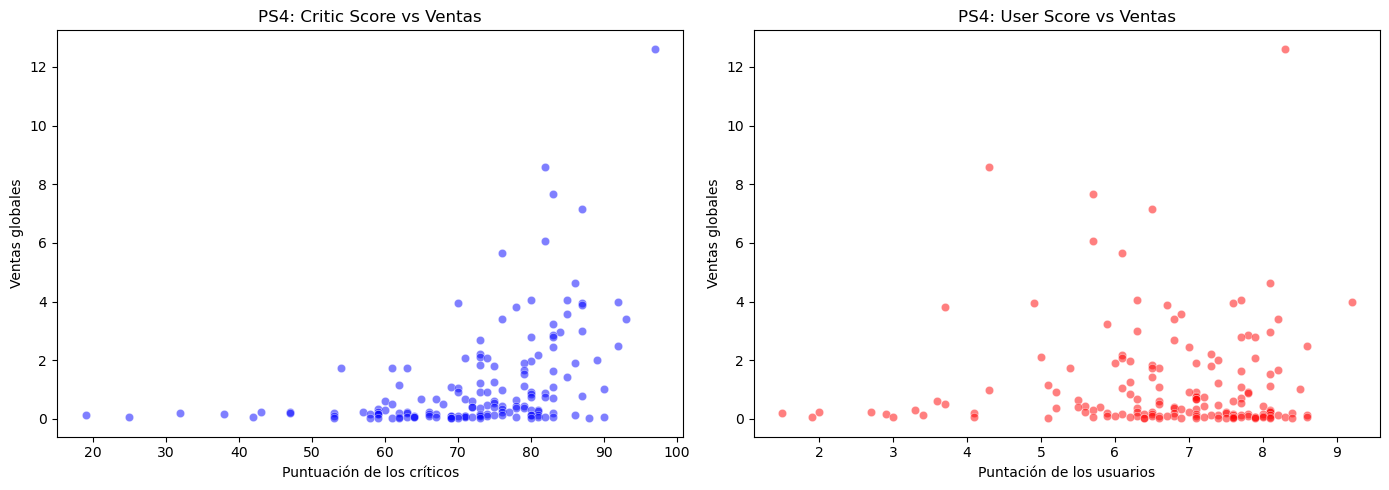

In [19]:
# Gráfica critic_score vs ventas
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sns.scatterplot(data = ps4_df, x = "critic_score", y = "total_sales", color = "blue", alpha = .5)
plt.title("PS4: Critic Score vs Ventas")
plt.xlabel("Puntuación de los críticos")
plt.ylabel("Ventas globales")

# Gráfica user_score vs ventas
plt.subplot(1,2,2)
sns.scatterplot(data = ps4_df, x = "user_score", y = "total_sales", color = "red", alpha = .5)
plt.title("PS4: User Score vs Ventas")
plt.xlabel("Puntación de los usuarios")
plt.ylabel("Ventas globales")

plt.tight_layout()
plt.show()

In [20]:
# Correlaciones
ps4_corr_critic = ps4_df[['critic_score', 'total_sales']].corr().iloc[0,1]
ps4_corr_user = ps4_df[['user_score', 'total_sales']].corr().iloc[0,1]
print("Coeficiente de correlación de Pearson")
print("Coeficiente critic_score-ventas:", ps4_corr_critic, "\nCoeficiente user_score-ventas:", ps4_corr_user)

Coeficiente de correlación de Pearson
Coeficiente critic_score-ventas: 0.4318482049982007 
Coeficiente user_score-ventas: 0.02423083236062296


**Conclusiones**

* La correlación entre las reseñas de críticos y las ventas es moderada (0.43), mientras que la de usuarios es prácticamente nula (0.024). Esto se observa en los gráficos de dispersión, donde la relación es más definida con los críticos, pero aún dispersa para ambos.
* Las calificaciones de los críticos influyen de forma moderada, pero no son un predictor absoluto del éxito comercial de los juegos.

### 3.7 Comparación de ventas en múltiples plataformas (mismos juegos)
En este apartado compararemos las ventas globales de los juegos que se han lanzado en más de una plataforma. El objetivo es identificar si un juego tiene un rendimiento significativamente mejor en una consola específica o si su éxito es más bien transversal. Analizaremos los títulos que aparecen en al menos dos plataformas dentro del período de 2010–2015.

* ¿Una misma franquicia rinde mejor en ciertas plataformas?

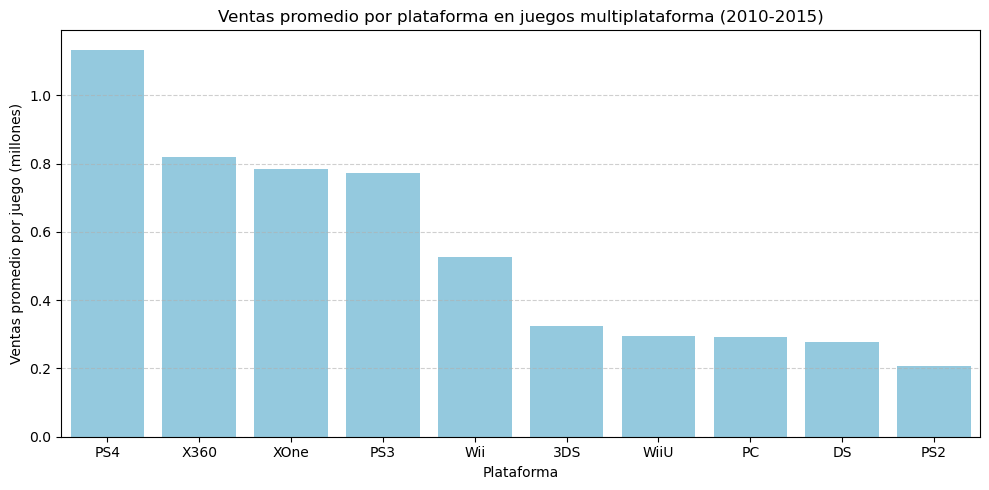

In [21]:
# Juegos que aparecen más de una vez (en distintas plataformas)
multi_platform_games = games_recent_df["name"].value_counts()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# Subconjunto con juegos multiplataforma
multi_df = games_recent_df[games_recent_df["name"].isin(multi_platform_games)]

# Calculamos ventas promedio por plataforma para estos juegos
multi_platform_sales = multi_df.groupby("platform")["total_sales"].mean().sort_values(ascending=False)
top_multi_platform_sales = multi_platform_sales.head(10) # Reducido a 10 para incluir PC y simplificar la visualización

# Gráfico
plt.figure(figsize=(10,5))
sns.barplot(x=top_multi_platform_sales.index, y=top_multi_platform_sales.values, color = "Skyblue")
plt.title("Ventas promedio por plataforma en juegos multiplataforma (2010-2015)")
plt.xlabel("Plataforma")
plt.ylabel("Ventas promedio por juego (millones)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Conclusiones**

* Los juegos multiplataforma tienden a tener mejor desempeño promedio en plataformas como PS4, X360 y XOne. PS4 lidera el promedio, lo cual coincide con nuestras conclusiones anteriores respecto a su crecimiento y rentabilidad potencial.
* Esto sugiere que para títulos lanzados en varias plataformas, PS4 y XOne son entornos especialmente favorables, mientras que plataformas más antiguas o con menor base activa (como WiiU) muestran menores niveles de rendimiento.

### 3.8 Distribución general de los juegos por género

Finalmente, exploramos el comportamiento de los diferentes géneros de videojuegos en términos de ventas globales. Esto nos permitirá identificar qué géneros dominan el mercado y cuáles tienen menor relevancia comercial.

* ¿Qué géneros son más rentables?
* ¿Qué tan consistente es el rendimiento dentro de cada género?

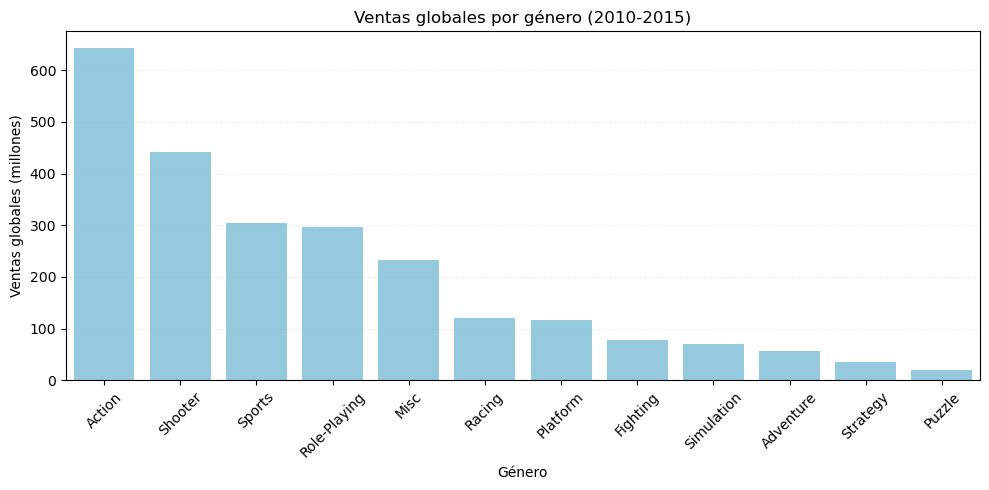

In [22]:
# Agrupamos por género y sumamos las ventas
genre_sales = games_recent_df.groupby("genre")["total_sales"].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=genre_sales.index, y=genre_sales.values, color="Skyblue")
plt.title("Ventas globales por género (2010-2015)")
plt.xlabel("Género")
plt.ylabel("Ventas globales (millones)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

**Conclusiones**

* El género **Action** domina el mercado en términos de volumen total de ventas, seguido de **Shooter**, **Sports** y **Role-Playing**.
* Estos cuatro géneros concentran la mayor parte del consumo, lo que indica una fuerte preferencia del público por experiencias dinámicas, competitivas o de alto impacto.
* Géneros como **Puzzle, Strategy, Simulation o Adventure**, aunque más de nicho, pueden aún ser rentables en contextos específicos, pero no deben ser el foco principal de campañas globales.

En general, podemos generalizar que los géneros de acción, disparos, deportes y role-playing concentran las ventas altas, mientras que géneros más tácticos o narrativos suelen tener una audiencia más limitada en volumen.

## 4. Creación de perfiles de usuario por región

Con el objetivo de definir estrategias comerciales más localizadas, analizaremos el comportamiento del mercado en tres regiones clave: Norteamérica (NA), Europa (EU) y Japón (JP). Para cada una estudiaremos:

* Las 5 plataformas más populares.
* Los 5 géneros más vendidos.
* El posible impacto de la clasificación ESRB en las ventas.

Este desglose nos permitirá identificar preferencias regionales y ajustar nuestras campañas y decisiones de publicación según las características comerciales de cada mercado.

### 4.1 Plataformas más populares por región
Comenzamos analizando las cinco plataformas con mayores ventas en cada una de las regiones, a fin de observar insights relevantes en las preferencias de los usuarios.

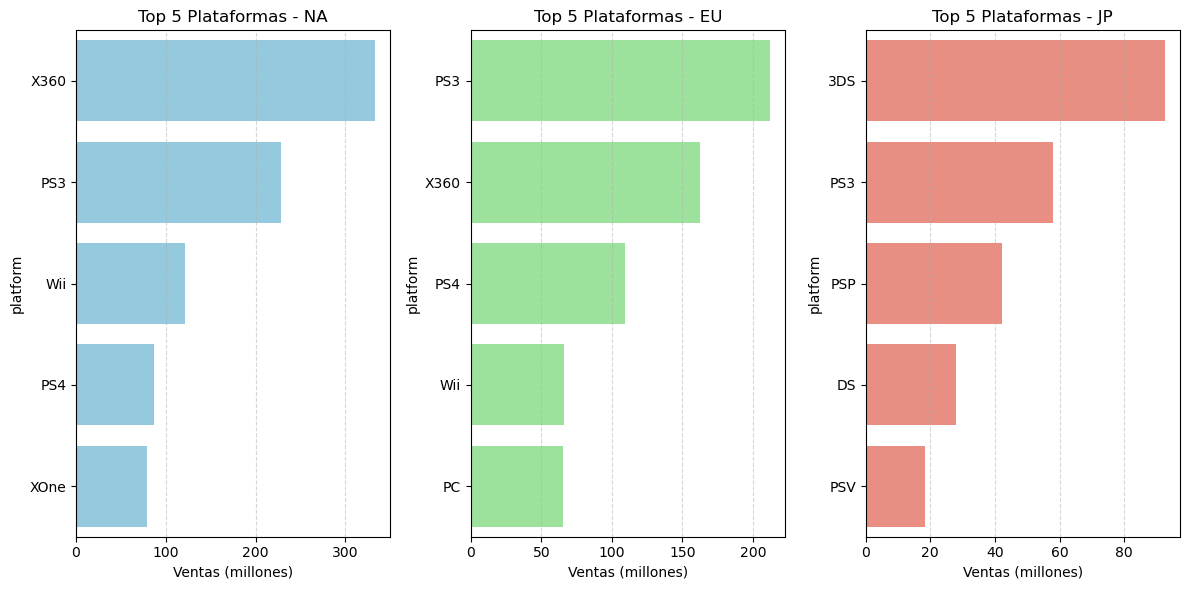

In [23]:
# Agrupamos y ordenamos por región
na_platforms = games_recent_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = games_recent_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = games_recent_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Plot conjunto
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=na_platforms.values, y=na_platforms.index, color='skyblue')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Top 5 Plataformas - NA")
plt.xlabel("Ventas (millones)")

plt.subplot(1, 3, 2)
sns.barplot(x=eu_platforms.values, y=eu_platforms.index, color='lightgreen')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Top 5 Plataformas - EU")
plt.xlabel("Ventas (millones)")

plt.subplot(1, 3, 3)
sns.barplot(x=jp_platforms.values, y=jp_platforms.index, color='salmon')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Top 5 Plataformas - JP")
plt.xlabel("Ventas (millones)")

plt.tight_layout()
plt.show()

**Conclusiones**

* **Norteamérica (NA)**: Domina X360, seguida de PS3 y Wii. El mercado es fuerte en **consolas de Microsoft** y Nintendo, lo que sugiere una fuerte presencia de público familiar y competitivo.
* **Europa (EU)**: Favorece más a PS3, X360 y PS4, mostrando una inclinación por **plataformas de Sony**. Las diferencias con NA son sutiles, pero notorias en el liderazgo de PlayStation.
* **Japón (JP)**: Es un mercado muy diferente: DS y 3DS dominan claramente, seguidas de PS3 y PSP, lo que indica una clara preferencia por consolas portátiles y por **desarrolladores nacionales**. Las consolas de Microsoft no aparecen.

### 4.2 Géneros más populares por región
En esta sección analizaremos cuáles son los cinco géneros más populares en cada región. Esto nos permitirá identificar las preferencias temáticas y de estilo de juego de los usuarios según su ubicación geográfica.

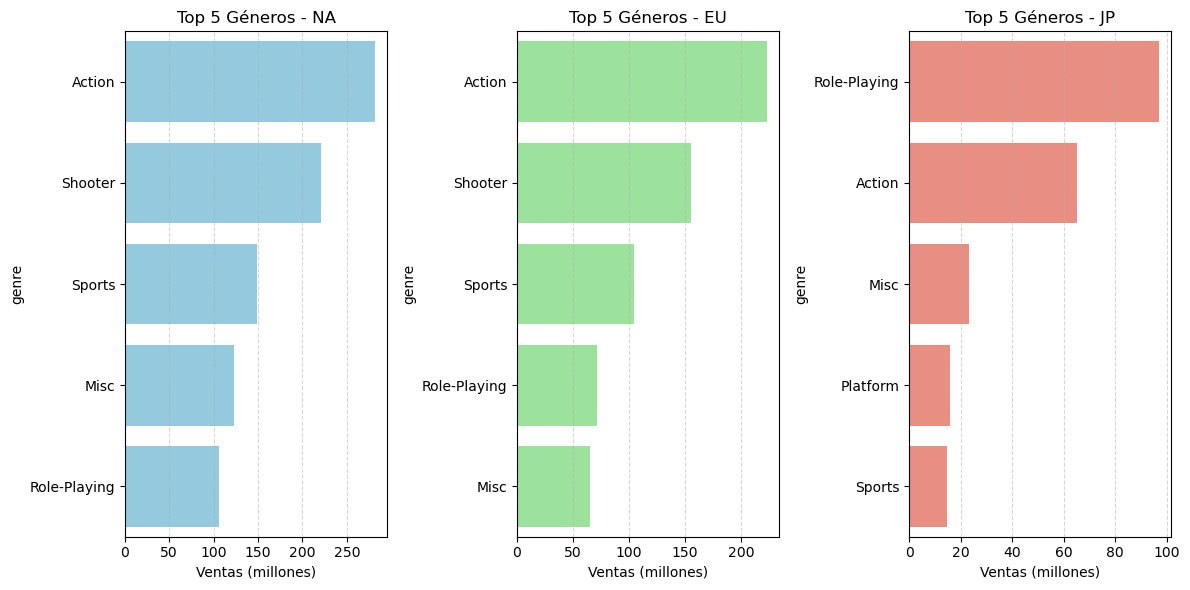

In [24]:
# Agrupamos por género y ordenamos región
na_genres = games_recent_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genres = games_recent_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genres = games_recent_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Gráficos
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=na_genres.values, y=na_genres.index, color='skyblue')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Top 5 Géneros - NA")
plt.xlabel("Ventas (millones)")

plt.subplot(1, 3, 2)
sns.barplot(x=eu_genres.values, y=eu_genres.index, color='lightgreen')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Top 5 Géneros - EU")
plt.xlabel("Ventas (millones)")

plt.subplot(1, 3, 3)
sns.barplot(x=jp_genres.values, y=jp_genres.index, color='salmon')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Top 5 Géneros - JP")
plt.xlabel("Ventas (millones)")

plt.tight_layout()
plt.show()

**Conclusiones**

* **NA y EU** presentan preferencias similares, con **Action, Shooter y Sports** como los géneros más vendidos. Esto sugiere una gran afinidad por juegos de alto dinamismo, competencia y entretenimiento masivo. **Action, Shooter** tienen especial relevancia en volumen de ventas.
* **Action** destaca en todas las regiones, aunque su presencia es menor en **JP** en comparación con el resto.
* En **JP**, los géneros más vendidos son **Role-Playing y Action** (con diferencia), seguidos de **Misc y Platform**. Esto indica una preferencia más tradicional y local, con fuerte peso de franquicias japonesas.

Estos patrones muestran que el contenido temático debe adaptarse al mercado objetivo. Por ejemplo, un RPG tiene mayores probabilidades de éxito en Japón, mientras que un shooter podría tener mejor recepción en Norteamérica o Europa.

### 4.3 Impacto de las calificaciones ESBR en las ventas por región
Evaluaremos si la clasificación de contenido ESRB tiene un impacto notable en las ventas por región. Las clasificaciones (como E, T, M, etc.) indican la edad recomendada del público y pueden influir en la decisión de compra, dependiendo de factores culturales o legales de cada región.

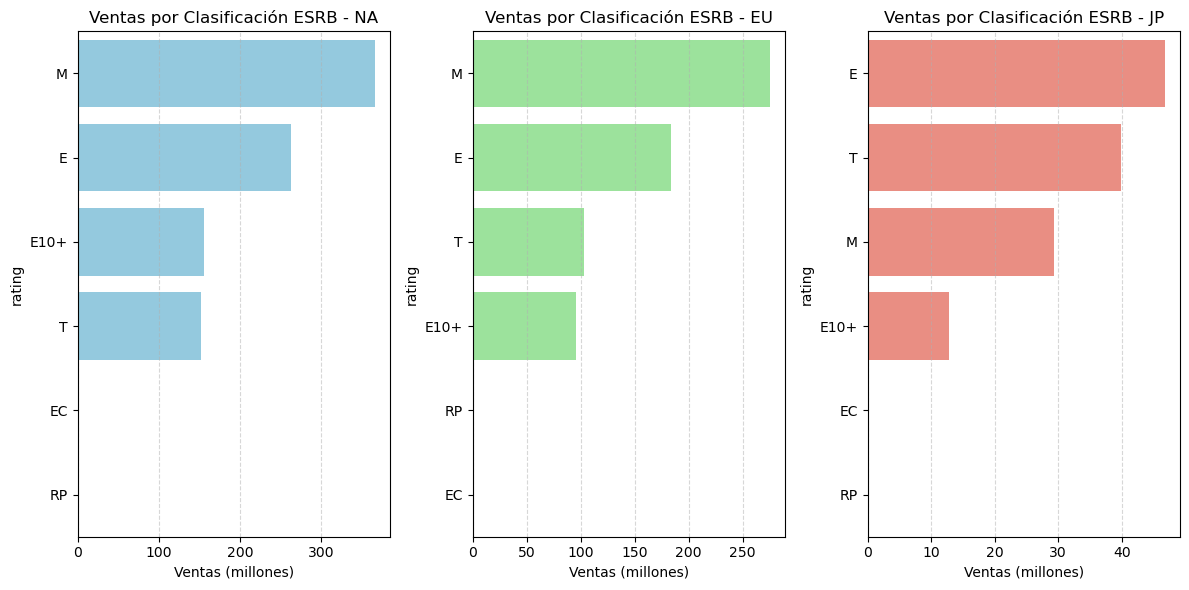

In [25]:
# Agrupamos por clasificación ESRB y región
na_rating = games_recent_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating = games_recent_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating = games_recent_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Gráficos
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=na_rating.values, y=na_rating.index, color='skyblue')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Ventas por Clasificación ESRB - NA")
plt.xlabel("Ventas (millones)")

plt.subplot(1, 3, 2)
sns.barplot(x=eu_rating.values, y=eu_rating.index, color='lightgreen')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Ventas por Clasificación ESRB - EU")
plt.xlabel("Ventas (millones)")

plt.subplot(1, 3, 3)
sns.barplot(x=jp_rating.values, y=jp_rating.index, color='salmon')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Ventas por Clasificación ESRB - JP")
plt.xlabel("Ventas (millones)")

plt.tight_layout()
plt.show()

**Conclusiones**

* En **NA y EU**, las clasificaciones más vendidas son **M** (Mature) y **E** (Everyone). Esto sugiere que los títulos orientados a adolescentes y adultos tienen un mercado sólido, al igual que los títulos familiares. La clasificación **E10+** (Everyone +10) y **T** (Teen) también tiene buen desempeño, aunque menor.
* En **JP**, aunque dominan **E y T**, se nota una menor dependencia de las clasificaciones ESRB. Esto puede deberse a que Japón usa otras formas de clasificación y algunos juegos ni siquiera tienen rating ESRB en esa región.
* La clasificación **EC** (Early Childhood) es irrelevante en términos de ventas en todas las regiones.
* **RP** corresponde a títulos no clasificados en su momento, usualmente en etapa previa al lanzamiento comercial.

Podemos inferir que la clasificación del contenido tiene un peso relativo en las decisiones de compra, especialmente en mercados como Norteamérica y Europa, donde puede influir tanto en la estrategia de marketing como en la distribución.

## Paso 5: Pruebas de hipótesis

Para obtener conclusiones con fundamento estadístico sobre las calificaciones de usuarios, plantearemos dos pruebas de hipótesis. Estableceremos un nivel de significancia α = 0.05, lo cual es común en análisis exploratorios y permite un buen balance entre error tipo I y II. También se hace uso de la prueba **Levene** para verificar si las varianzas pueden considerarse iguales.

**Nota**
* **Error tipo I:**  Ocurre cuando rechazamos la hipótesis nula cuando, en realidad, es verdadera.
* **Error tipo II:** Ocurre cuando no rechazamos la hipótesis nula cuando, en realidad, es falsa.

### 5.1 Hipótesis 1: Calificaciones de usuarios en Xbox One y PC
Buscaremos verificar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
* **Formulación de hipótesis**
    * **Hipótesis nula (H₀):** Las medias de user_score para Xbox One y PC son iguales.
    * **Hipótesis alternativa (H₁):** Las medias de user_score para Xbox One y PC son diferentes.

Usamos una prueba t de **Student** para dos muestras independientes (ttest_ind), dado que comparamos dos medias de grupos distintos con datos numéricos. Las muestras son independientes. Además, aplicamos la prueba de **Levene** para verificar si las varianzas pueden considerarse iguales.

In [26]:
# Filtramos plataformas y eliminamos NaNs
xone_scores = games_recent_df[(games_recent_df["platform"] == "XOne")]["user_score"].dropna()
pc_scores = games_recent_df[(games_recent_df["platform"] == "PC")]["user_score"].dropna()

# Prueba de Levene para igualdad de varianzas
levene_stat1, levene_p1 = st.levene(xone_scores, pc_scores)
print("Prueba de Levene (Xbox vs PC): pvalue =", levene_p1)

# Prueba t
# Se considera igualdad de varianzas si p > 0.05
equal_var1 = levene_p1 > 0.05

result = st.ttest_ind(xone_scores, pc_scores, equal_var=equal_var1)
print("pvalue =", result.pvalue)

if result.pvalue < 0.05:
    print("Se rechaza H₀: hay diferencia significativa entre las medias.")
else:
    print("No se puede rechazar H₀: no hay evidencia de diferencia significativa.")

Prueba de Levene (Xbox vs PC): pvalue = 0.015392565757709144
pvalue = 0.6300705919359528
No se puede rechazar H₀: no hay evidencia de diferencia significativa.


**Conclusión:** No hay evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios difieren entre Xbox One y PC. A pesar de que sus varianzas son distintas, las medias pueden considerarse estadísticamente similares dentro del margen de error definido (α = 0.05).

### 5.2 Hipótesis 2: Calificaciones de usuarios en los géneros Acción y Deportes
Verificaremos si los géneros Action y Sports reciben calificaciones distintas por parte de los usuarios.

* **Formulación de hipótesis**
    * **Hipótesis nula (H₀):** Las medias de user_score para los géneros Action y Sports son iguales.
    * **Hipótesis alternativa (H₁):** Las medias de user_score para los géneros Action y Sports son diferentes.

Usamos nuevamente una prueba t para dos muestras independientes. Empleamos la prueba levene para comprobar si las varianzas son similares o no.

In [27]:
# Filtramos géneros y eliminamos NaNs
action_scores = games_recent_df[(games_recent_df["genre"] == "Action")]["user_score"].dropna()
sports_scores = games_recent_df[(games_recent_df["genre"] == "Sports")]["user_score"].dropna()

# Prueba de Levene para igualdad de varianzas
levene_stat2, levene_p2 = st.levene(action_scores, sports_scores)
print("Prueba de Levene (Action vs Sports): pvalue =", levene_p2)

# Prueba t
alpha = .05
equal_var2 = levene_p2 > 0.05
result_2 = st.ttest_ind(action_scores, sports_scores, equal_var = equal_var2)

# Prueba de la segunda hipotesis
print("pvalue_2 =", result_2.pvalue)
if result_2.pvalue < alpha:
    print("Se rechaza H₀: hay diferencia significativa entre las medias.")
else:
    print("No se puede rechazar H₀: no hay evidencia de diferencia significativa.")

Prueba de Levene (Action vs Sports): pvalue = 8.133072665964924e-05
pvalue_2 = 1.918016559591447e-13
Se rechaza H₀: hay diferencia significativa entre las medias.


**Conclusión:** Existe evidencia estadísticamente significativa para afirmar que las calificaciones promedio de los usuarios difieren entre los géneros Action y Sports. Específicamente, los datos sugieren que los usuarios califican de forma distinta este tipo de juegos, y la diferencia entre sus medias no es producto del azar según el umbral de significancia definido (α = 0.05).

## Paso 6: Conclusión general

En este proyecto, orientado a desarrollar campañas y proyectos de videojuegos para el año 2017, se analizaron distintos aspectos clave del mercado con base en datos históricos y métricas relevantes. A partir del análisis exploratorio, visualizaciones y pruebas estadísticas, se obtuvieron los siguientes hallazgos:

* Entre **2005 y 2011** se registró una alta densidad de ventas debido al auge simultáneo de múltiples consolas como **DS, Wii, PS3 y Xbox 360**. Sin embargo, a partir de **2012** las ventas globales cayeron considerablemente, ya que varias de estas plataformas entraron en su fase final de vida útil (normalmente de 7 a 10 años).
* De cara al año **2017**, las plataformas más relevantes y con mayor potencial son **PS4, Xbox One y PC**. **PS4** destaca como la plataforma líder, mostrando una tendencia de crecimiento constante en años recientes.
* Las plataformas modernas como **PS4, XOne y PC** presentan outliers positivos en sus ventas (juegos que vendieron mucho más que la mediana), lo cual indica un alto potencial para grandes éxitos comerciales, aunque con una dispersión amplia en sus resultados.
* Las **reseñas de críticos y usuarios** tienen una influencia limitada en las ventas. Se encontró una correlación moderada entre las reseñas de críticos y las ventas, pero una casi nula correlación con las reseñas de usuarios. Por lo tanto, no se recomienda basar las campañas únicamente en puntuaciones.
* En términos de género, **Action, Shooter y Sports** son los más rentables globalmente. Sin embargo, al segmentar por región se detectan diferencias claras:
  * En **Norteamérica y Europa**, los géneros **Action, Shooter y Sports** dominan.
  * En Japón, el género **Role-Playing** (RPG) es el más popular, seguido por **Action**, **Misc** y géneros más localizados.
* La clasificación **ESRB** no parece ser un impedimento para las ventas, pero sí refleja las tendencias culturales y legales de cada región. Las clasificaciones **M** (Mature), **E** (Everyone) y **T** (Teen) concentran la mayoría de las ventas, especialmente en **NA y EU**.
* Las **pruebas de hipótesis** apoyaron algunas de las observaciones:
  * No se encontró una diferencia significativa en las calificaciones promedio de usuarios entre Xbox One y PC, lo cual podría deberse a que ambas comparten un ecosistema técnico similar (Microsoft).
  * Por el contrario, sí se encontró una diferencia significativa en las calificaciones promedio de los géneros **Action y Sports**, lo que refuerza la idea de que el tipo de juego influye en la percepción del usuario.

### Recomendaciones generales para campañas en 2017
* **Plataformas prioritarias:** Enfocarse en PS4, seguido de XOne y PC. PS4 representa el mejor potencial de retorno.
* **Géneros prioritarios:** En campañas generales, centrarse en juegos de **Acción**, complementando con **Shooter y Sports** según el mercado (o **role-playing** en el caso de Japón).
* Para campañas regionales:
  * **Occidente (NA y EU):** Action y Shooter.
  * **Japón:** Role-Playing y Action.
* Clasificaciones recomendadas:
  * Enfocar esfuerzos en títulos clasificados como **E, T y M**, priorizando E para maximizar cobertura global.
  * En mercados como **NA y EU**, **M y E** tienen fuerte aceptación.

Con base en este análisis, se cuenta con información objetiva para diseñar campañas eficaces y segmentadas para el año 2017, maximizando el retorno de inversión en mercados clave.